## FLU SHOT LEARNING: PREDICT H1N1 AND SEASONAL FLU VACCINES

Please fill out:
* Student name: Julliet Iswana
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


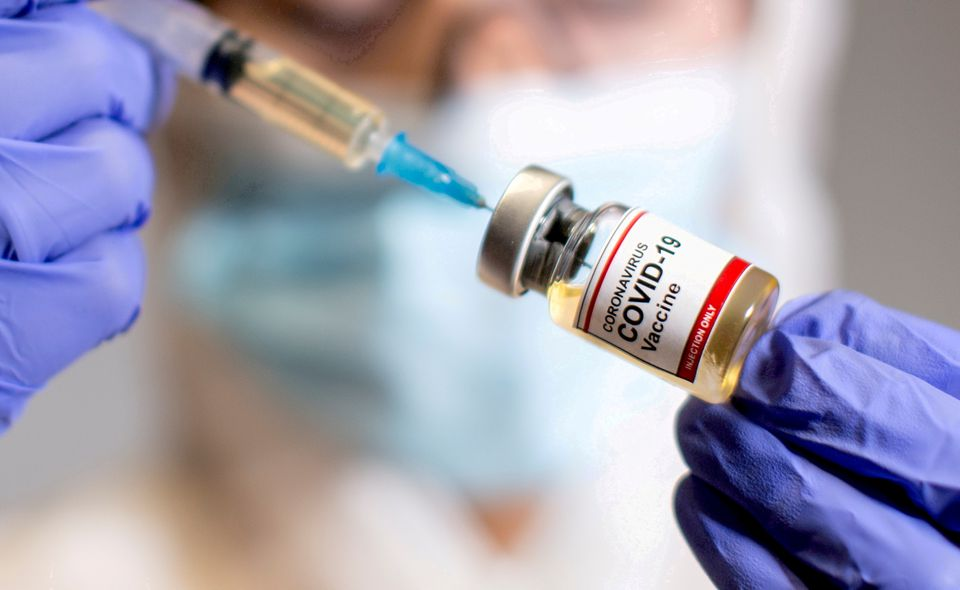

**IMPORT LIBRARIES FOR PROJECT

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:


# Load the training set features and labels
train_features = pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')

# Display the first few rows of the training set features and labels
train_features_head = train_features.head()
train_labels_head = train_labels.head()

train_features_head, train_labels_head


(   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
 0              0           1.0             0.0                        0.0   
 1              1           3.0             2.0                        0.0   
 2              2           1.0             1.0                        0.0   
 3              3           1.0             1.0                        0.0   
 4              4           2.0             1.0                        0.0   
 
    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
 0                   0.0                   0.0                    0.0   
 1                   1.0                   0.0                    1.0   
 2                   1.0                   0.0                    0.0   
 3                   1.0                   0.0                    1.0   
 4                   1.0                   0.0                    1.0   
 
    behavioral_large_gatherings  behavioral_outside_home  \
 0                          0.

**training_set_features**  

contains information about the respondents, such as their level of concern about the H1N1 virus, knowledge about H1N1, behavioral habits, and demographic details. 

**training_set_labels**

provides the target variables for each respondent, indicating whether they received the H1N1 vaccine (h1n1_vaccine) and the seasonal vaccine (seasonal_vaccine).

In [3]:
train_features.shape


(26707, 36)

In [4]:
train_labels.shape

(26707, 3)

In [5]:
# Merge the two data sets
merged_data = train_features.merge(train_labels, on="respondent_id")

**EDA ANALYSIS**

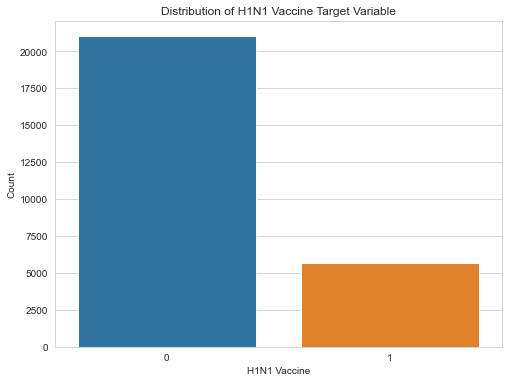

In [6]:

# Setting for plots
sns.set_style("whitegrid")

# Plot distribution of the h1n1_vaccine target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=train_labels['h1n1_vaccine'])
plt.title('Distribution of H1N1 Vaccine Target Variable')
plt.xlabel('H1N1 Vaccine')
plt.ylabel('Count')
plt.show()




Distribution of `H1N1 Vaccine Target Variable` It appears that the majority of respondents in the training data did not receive the H1N1 vaccine. This indicates a class imbalance which we need to consider during modeling.

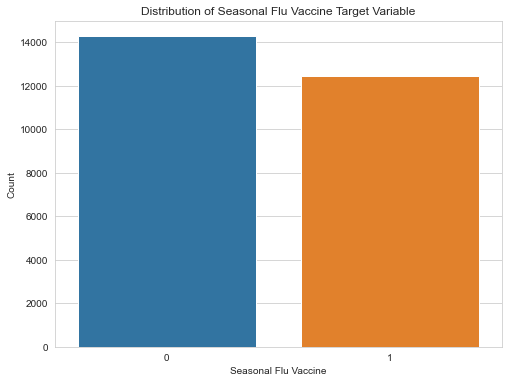

In [7]:
# Plot distribution of the seasonal_vaccine target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=train_labels['seasonal_vaccine'])
plt.title('Distribution of Seasonal Flu Vaccine Target Variable')
plt.xlabel('Seasonal Flu Vaccine')
plt.ylabel('Count')
plt.show()


The distribution of the `seasonal_vaccine` target variable shows that there's a more balanced split between those who received the seasonal flu vaccine and those who did not. Compared to the H1N1 vaccine distribution, a larger proportion of respondents in the training data received the seasonal flu vaccine.

This provides an interesting perspective: while many respondents chose to get vaccinated for the seasonal flu, fewer decided to get the H1N1 vaccine. This discrepancy might be due to various reasons, such as public perception, availability, or urgency.



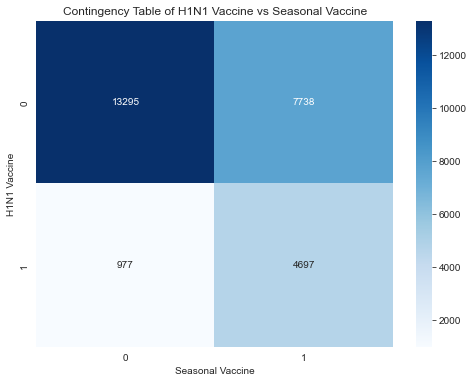

In [8]:
# Create a contingency table
contingency_table = pd.crosstab(train_labels['h1n1_vaccine'], train_labels['seasonal_vaccine'])

# Plot the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table of H1N1 Vaccine vs Seasonal Vaccine')
plt.xlabel('Seasonal Vaccine')
plt.ylabel('H1N1 Vaccine')
plt.show()



From the heatmap of the contingency table, we can observe the following:

A significant number of respondents didn't take either the H1N1 vaccine or the seasonal flu vaccine.
A large group took only the seasonal flu vaccine but not the H1N1 vaccine.
There's also a notable group that took both vaccines.

**CORRELATION ANALYSIS**


this will help us in understanding how the different features correlate with the decision to get the H1N1 vaccine and the seasonal flu vaccine. 



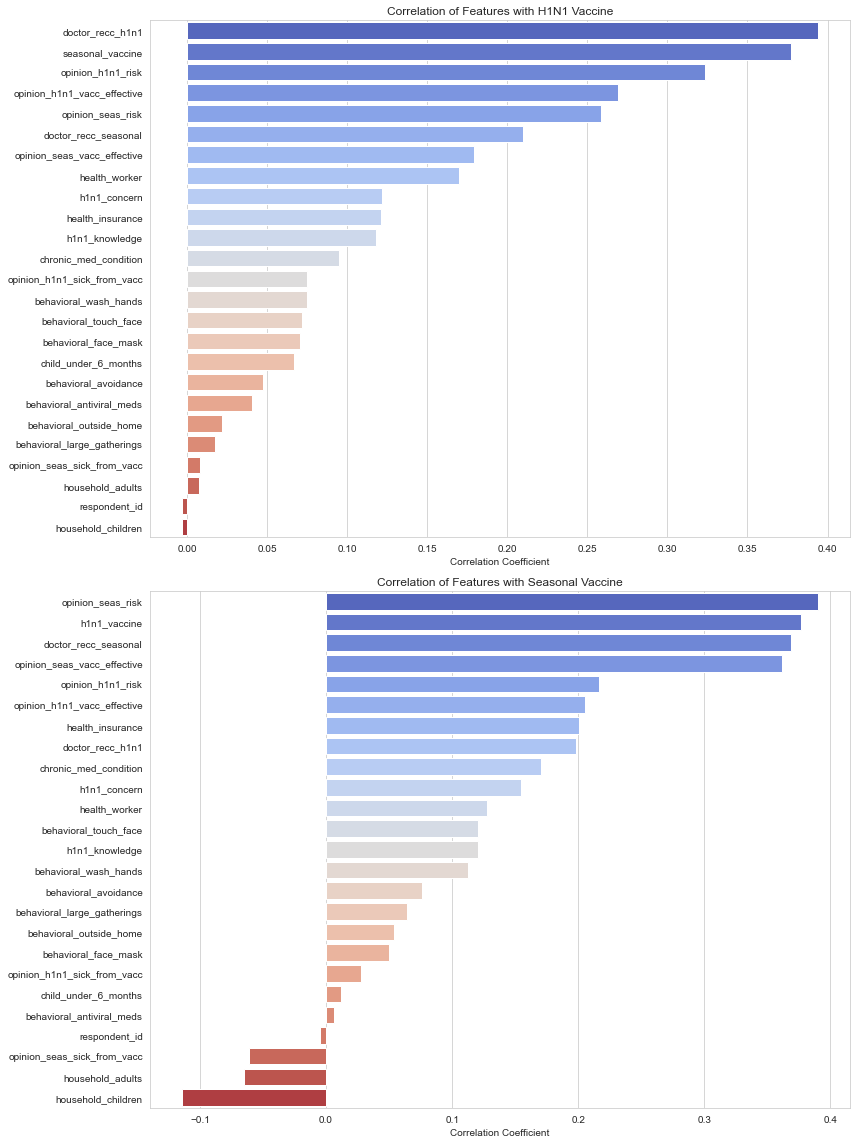

In [9]:


# Compute the correlation matrix
correlation_matrix = merged_data.corr()

# Extract correlations with the two target variables
h1n1_correlations = correlation_matrix["h1n1_vaccine"].sort_values(ascending=False)
seasonal_correlations = correlation_matrix["seasonal_vaccine"].sort_values(ascending=False)

# Plot correlations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# H1N1 Vaccine Correlations
sns.barplot(x=h1n1_correlations[1:], y=h1n1_correlations.index[1:], ax=ax1, palette="coolwarm")
ax1.set_title("Correlation of Features with H1N1 Vaccine")
ax1.set_xlabel("Correlation Coefficient")

# Seasonal Vaccine Correlations
sns.barplot(x=seasonal_correlations[1:], y=seasonal_correlations.index[1:], ax=ax2, palette="coolwarm")
ax2.set_title("Correlation of Features with Seasonal Vaccine")
ax2.set_xlabel("Correlation Coefficient")

plt.tight_layout()
plt.show()


H1N1 Vaccine Correlations:

Doctor recommendations (doctor_recc_h1n1) have the highest positive correlation with getting the H1N1 vaccine. This suggests that individuals are more likely to get vaccinated if recommended by a healthcare professional.
Respondents' opinions on the risks and effectiveness of the H1N1 vaccine (opinion_h1n1_risk, opinion_h1n1_vacc_effective, and opinion_h1n1_sick_from_vacc) also show significant correlations.


Seasonal Vaccine Correlations:

The age group of the respondent (age_group) has a strong positive correlation with receiving the seasonal vaccine.
Doctor recommendations for the seasonal flu vaccine (doctor_recc_seasonal) and opinions about its risk and effectiveness are also significantly correlated.
Interestingly, the correlation of h1n1_vaccine with the seasonal vaccine is also evident, reinforcing our earlier observation that the two are not independent.

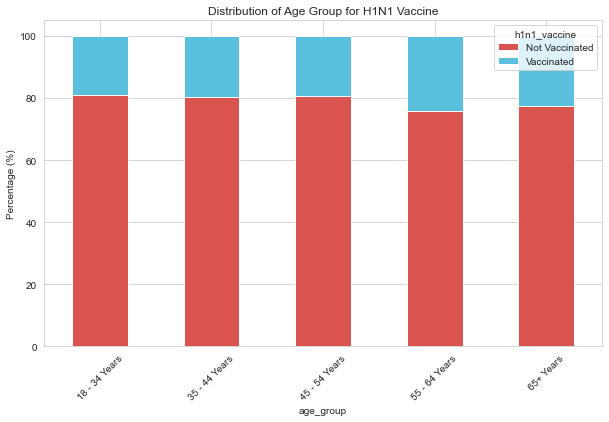

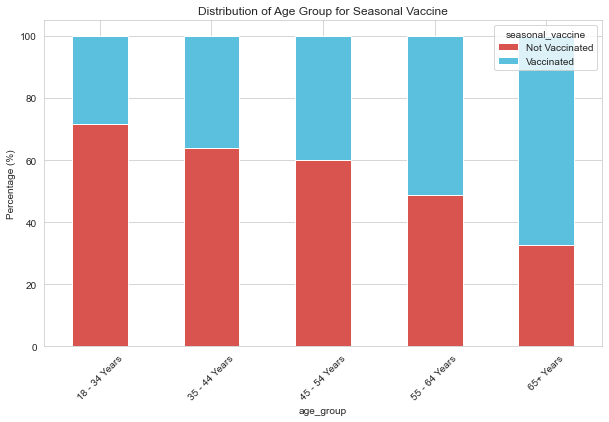

In [10]:
# Function to plot stacked bar chart for demographic feature vs vaccine
def plot_stacked_bar(feature, vaccine, title):
    # Create crosstab for the feature and vaccine
    ct = pd.crosstab(merged_data[feature], merged_data[vaccine], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, color=['#d9534f', '#5bc0de'], figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title=vaccine, labels=['Not Vaccinated', 'Vaccinated'])
    plt.show()

# Plot for age_group vs h1n1_vaccine
plot_stacked_bar('age_group', 'h1n1_vaccine', 'Distribution of Age Group for H1N1 Vaccine')

# Plot for age_group vs seasonal_vaccine
plot_stacked_bar('age_group', 'seasonal_vaccine', 'Distribution of Age Group for Seasonal Vaccine')


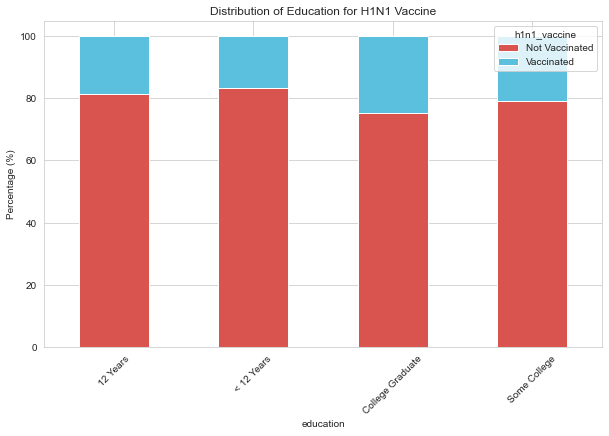

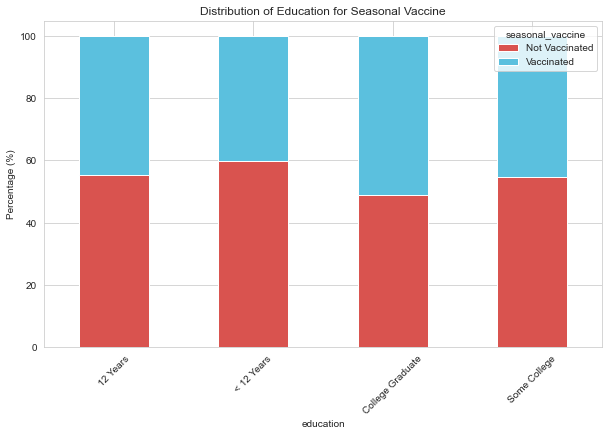

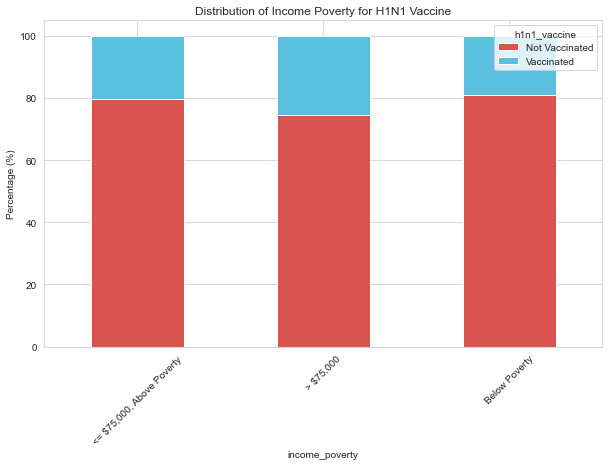

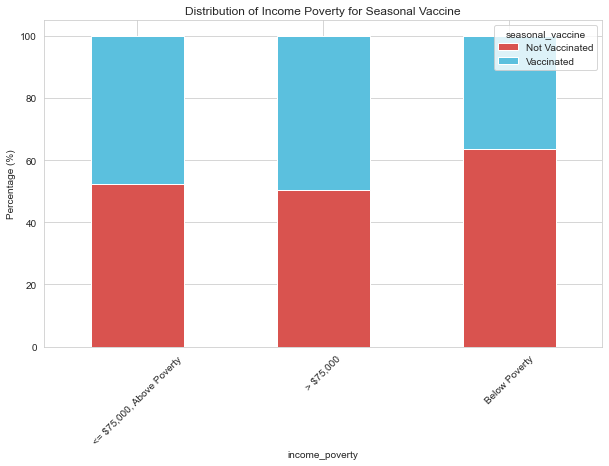

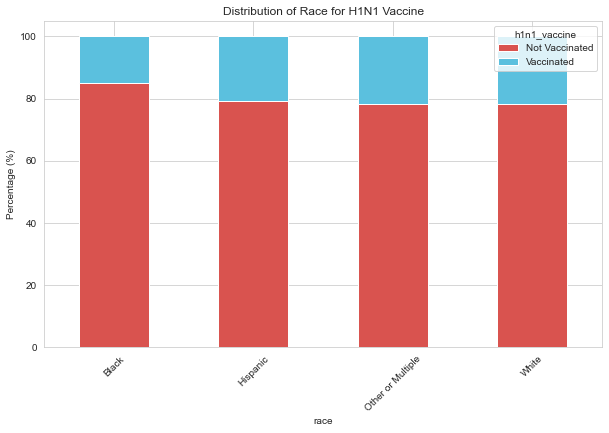

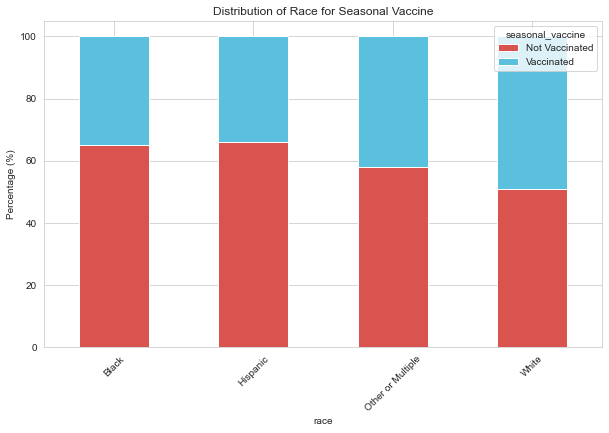

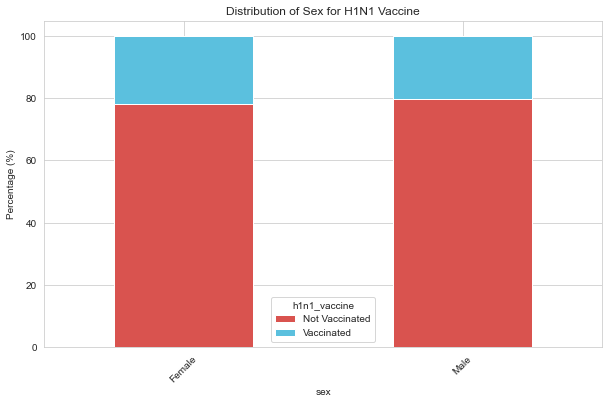

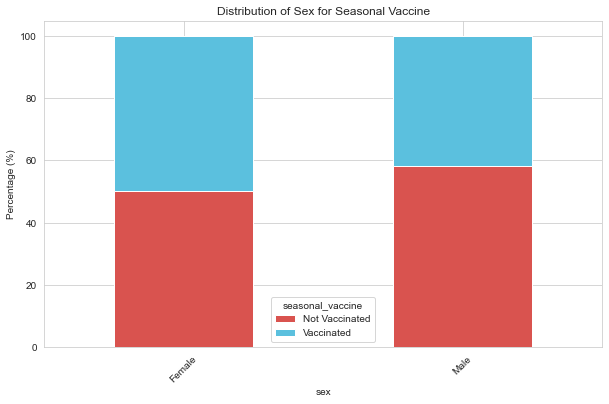

In [11]:
# Plotting the distribution for other demographic features

# For education vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('education', 'h1n1_vaccine', 'Distribution of Education for H1N1 Vaccine')
plot_stacked_bar('education', 'seasonal_vaccine', 'Distribution of Education for Seasonal Vaccine')

# For income_poverty vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('income_poverty', 'h1n1_vaccine', 'Distribution of Income Poverty for H1N1 Vaccine')
plot_stacked_bar('income_poverty', 'seasonal_vaccine', 'Distribution of Income Poverty for Seasonal Vaccine')

# For race vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('race', 'h1n1_vaccine', 'Distribution of Race for H1N1 Vaccine')
plot_stacked_bar('race', 'seasonal_vaccine', 'Distribution of Race for Seasonal Vaccine')

# For sex vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('sex', 'h1n1_vaccine', 'Distribution of Sex for H1N1 Vaccine')
plot_stacked_bar('sex', 'seasonal_vaccine', 'Distribution of Sex for Seasonal Vaccine')


The stacked bar charts illustrate the distribution of vaccinations based on various demographic features:

Education:
For both the H1N1 and seasonal vaccines, individuals with higher education levels (e.g., College Graduate) tend to have higher vaccination rates compared to those with lower education levels.
Income Poverty:
Individuals below the poverty line (Below Poverty) have a slightly lower vaccination rate for both vaccines, especially the seasonal vaccine, compared to those above the poverty line.
Race:
White individuals have a notably higher vaccination rate for both vaccines compared to other racial groups.
The seasonal vaccine's distribution further highlights this disparity, with the Black and Other or Multiple race groups having notably lower vaccination rates.
Sex:
Females have a slightly higher vaccination rate for both vaccines compared to males.

**DATA CLEANING AND PREPROSESSING**

In [12]:
# Check for missing values in the training set features
missing_values = train_features.isnull().sum()
missing_percentage = (missing_values / len(train_features)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

missing_data

,Missing Values,Percentage
employment_occupation,13470,50.436215
employment_industry,13330,49.912008
health_insurance,12274,45.957989
income_poverty,4423,16.561201
doctor_recc_h1n1,2160,8.087767
doctor_recc_seasonal,2160,8.087767
rent_or_own,2042,7.645936
employment_status,1463,5.477965
marital_status,1408,5.272026
education,1407,5.268282


 Several columns have missing values. The columns employment_occupation, employment_industry, and health_insurance have notably high percentages of missing data, with 50.44%, 49.91%, and 45.96% missing respectively. To handle the missing data, we have a few options:

For categorical data:
Fill missing values with the mode (most frequent value) of the column.
Create a new category, e.g., "Unknown" or "Not Provided".
For numerical data:
Fill with mean, median, or a designated placeholder value.
Use a model like KNN to impute the missing values.